In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("entryLevel_cleaned.csv")


In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Job_Code,hourly,employer_provided,min_salary,...,AWS,Tableau,Hadoop,C_lang,Java,app,debug,HTML,object,experience
0,Data Scientist I,$65K - $111K (Glassdoor est.),Data Scientist I - NLPWho we areAmerican Inter...,3.6,AIG\n3.6,"Houston, TX",DS,0,0,65,...,0,0,0,0,0,0,0,0,0,1
1,Data Scientist I,$79K - $133K (Glassdoor est.),Job Description:Knowesis - Interesting Work wi...,4.5,Knowesis Inc.\n4.5,"Hurlburt Field, FL",DS,0,0,79,...,1,0,0,0,0,1,0,0,0,0
2,Data Engineer I,$49K - $94K (Glassdoor est.),General Summary:\n\nThe Data Engineer is respo...,3.8,Elevate Credit\n3.8,"Addison, TX",DS,0,0,49,...,0,0,0,1,1,1,1,0,0,1
3,Data Scientist I,$64K - $108K (Glassdoor est.),DescriptionReaderLink. We Link. Publishers. Bo...,2.4,ReaderLink\n2.4,"Oak Brook, IL",DS,0,0,64,...,1,0,0,0,0,0,0,0,0,1
4,Data Analyst I - Data Science Team,$78K - $129K (Glassdoor est.),"Wednesday, October 14, 2020\n\n \nThe Data Sci...",3.3,CNA Corporation\n3.3,"Arlington, VA",DS,0,0,78,...,1,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object',
       'experience'],
      dtype='object')

In [7]:
df.job_state.value_counts()

 CA              144
 MD              140
 TX               70
 NY               70
 VA               66
 MA               59
 FL               48
 CO               35
 WA               32
 IL               30
 PA               27
 AZ               25
 NJ               23
 OH               22
 GA               22
 NC               22
Remote            18
United States     16
 MN               16
 NE               15
 OR               14
 UT               13
 TN               12
 MO               12
 MI               12
 AL               10
 WI                8
 MS                7
 RI                6
 IN                6
 LA                5
 KY                4
 KS                4
 VT                4
 NH                4
 AR                3
Virginia           3
 DC                3
 NM                3
 MT                2
Maryland           2
 DeKalb            2
 SD                2
 ND                2
 SC                1
Louisiana          1
Florida            1
Oregon       

In [8]:
def state_change(state):
    x = state.strip()
    if x.lower() == "virginia":
        return "VA"
    elif x.lower()  == "maryland":
        return "MD"
    elif x.lower() == "new jersey":
        return "NJ"
    elif x.lower()  == "louisiana":
        return "LA"
    elif x.lower() == "arapahoe":
        return "CO"
    elif x.lower() == "massachusetts":
        return "MA"
    elif x.lower() == "oregon":
        return "OR"
    elif x.lower() == "florida":
        return "FL"
    elif x.lower() == "dekalb":
        return "GA"
    else:
        return x

In [9]:
df.job_state = df.job_state.apply(state_change)

In [10]:
df.job_state.value_counts()

CA               144
MD               142
NY                70
TX                70
VA                69
MA                60
FL                49
CO                36
WA                32
IL                30
PA                27
AZ                25
NJ                24
GA                24
OH                22
NC                22
Remote            18
MN                16
United States     16
NE                15
OR                15
UT                13
TN                12
MI                12
MO                12
AL                10
WI                 8
MS                 7
LA                 6
RI                 6
IN                 6
NH                 4
KS                 4
KY                 4
VT                 4
AR                 3
DC                 3
NM                 3
ND                 2
MT                 2
SD                 2
DE                 1
ME                 1
SC                 1
Name: job_state, dtype: int64

In [11]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object',
       'experience'],
      dtype='object')

In [12]:
df['min_salary'] = df.apply(lambda x: x['min_salary'] * 2 if x['hourly'] == 1 else x['min_salary'], axis = 1)
df['max_salary'] = df.apply(lambda x: x['max_salary'] * 2 if x['hourly'] == 1 else x['max_salary'], axis = 1)
df['avg_salary'] = df.apply(lambda x: x['avg_salary'] * 2 if x['hourly'] == 1 else x['avg_salary'], axis = 1)


In [13]:
df[df.hourly == 1][['hourly','min_salary','max_salary','avg_salary']]

,hourly,min_salary,max_salary,avg_salary
210,1,48,76,62.0
211,1,48,76,62.0
212,1,48,76,62.0
213,1,48,76,62.0
214,1,48,76,62.0
215,1,48,76,62.0
216,1,48,76,62.0
217,1,48,76,62.0
218,1,48,76,62.0
257,1,44,66,55.0


In [14]:
df.company_text = df.company_text.apply(lambda x: x.replace("\n",""))

In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object',
       'experience'],
      dtype='object')

In [16]:
skills = ['python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object']


In [17]:
DS_sals = df.apply(lambda x: x['avg_salary'] if x['Job_Code'] == 'DS' else -1, axis = 1)
DS_sals = DS_sals[DS_sals != -1]
DS_sals_avg = DS_sals.mean()
DS_sals_avg

68.69922630560929

In [18]:
SE_sals = df.apply(lambda x: x['avg_salary'] if x['Job_Code'] == 'SE' else -1, axis = 1)
SE_sals = SE_sals[SE_sals != -1]
SE_sals_avg = SE_sals.mean()
SE_sals_avg

76.88878504672897

<AxesSubplot:>

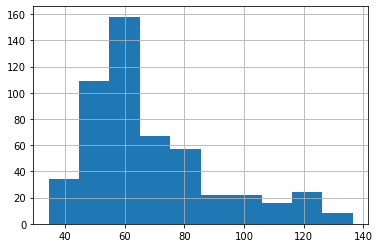

In [19]:
DS_sals.hist()

<AxesSubplot:>

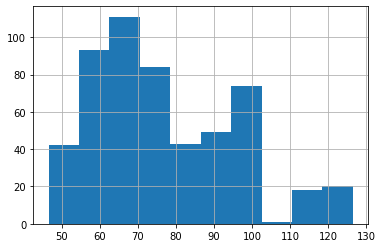

In [20]:
SE_sals.hist()

<AxesSubplot:>

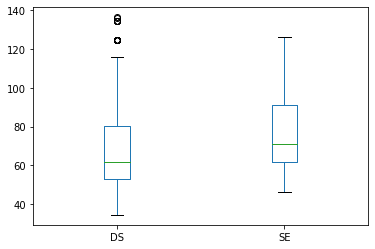

In [21]:
combine = pd.concat([DS_sals,SE_sals],axis=1)
combine = combine.rename(index=str, columns={0: "DS", 1:"SE"})
combine.plot.box()

In [22]:
DS_sals.describe()


count    517.000000
mean      68.699226
std       22.518510
min       34.500000
25%       53.000000
50%       62.000000
75%       80.500000
max      136.500000
dtype: float64

In [23]:
SE_sals.describe()

count    535.000000
mean      76.888785
std       18.652155
min       46.500000
25%       62.000000
50%       71.000000
75%       91.000000
max      126.500000
dtype: float64

In [24]:
DS_state = df.apply(lambda x: x['job_state'] if x['Job_Code'] == 'DS' else -1, axis = 1)
DS_state = DS_state[DS_state != -1]

SE_state = df.apply(lambda x: x['job_state'] if x['Job_Code'] == 'SE' else -1, axis = 1)
SE_state = SE_state[SE_state != -1]

In [25]:
DS_state.value_counts()

CA               76
VA               47
NY               45
TX               39
FL               38
MA               31
IL               20
CO               19
PA               17
WA               16
MD               16
GA               12
AZ               12
United States    12
NC               11
NJ               10
TN                8
MN                7
MS                7
MI                6
MO                6
LA                5
WI                5
OH                5
Remote            5
UT                5
IN                4
AL                4
RI                3
KY                3
AR                3
NM                2
NE                2
OR                2
SD                2
ND                2
MT                2
DC                2
VT                2
ME                1
SC                1
KS                1
DE                1
dtype: int64

In [26]:
SE_state.value_counts()

MD               126
CA                68
TX                31
MA                29
NY                25
VA                22
CO                17
OH                17
WA                16
NJ                14
NE                13
AZ                13
OR                13
Remote            13
GA                12
NC                11
FL                11
IL                10
PA                10
MN                 9
UT                 8
MO                 6
AL                 6
MI                 6
TN                 4
United States      4
NH                 4
KS                 3
WI                 3
RI                 3
IN                 2
VT                 2
NM                 1
KY                 1
DC                 1
LA                 1
dtype: int64

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object',
       'experience'],
      dtype='object')

In [28]:
num_intern_DS = df.apply(lambda x: 1 if 'intern' in x['Job Title'].lower() and x['Job_Code'] == 'DS' else 0, axis = 1)
num_intern_DS = sum(num_intern_DS)
num_intern_DS

num_intern_SE = df.apply(lambda x: 1 if 'intern' in x['Job Title'].lower() and x['Job_Code'] == 'SE' else 0, axis = 1)
num_intern_SE = sum(num_intern_SE)
num_intern_SE


intern_count = sum(df.apply(lambda x: 1 if 'intern' in x['Job Title'].lower() else 0, axis = 1))
print(intern_count, num_intern_DS, num_intern_SE)

69 66 3


In [29]:
DS_minus_intern = df.apply(lambda x: x['avg_salary'] if 'intern' not in x['Job Title'].lower() and x['Job_Code'] == "DS" else -1, axis = 1)
SE_minus_intern = df.apply(lambda x: x['avg_salary'] if 'intern' not in x['Job Title'].lower() and x['Job_Code'] == "SE" else -1, axis = 1)

DS_minus_intern = DS_minus_intern[DS_minus_intern != -1]
SE_minus_intern = SE_minus_intern[SE_minus_intern != -1]

In [30]:
DS_minus_intern.describe()

count    451.000000
mean      68.722838
std       22.233876
min       34.500000
25%       53.000000
50%       62.500000
75%       80.500000
max      136.500000
dtype: float64

In [31]:
SE_minus_intern.describe()

count    532.000000
mean      76.850564
std       18.678385
min       46.500000
25%       62.000000
50%       71.000000
75%       91.000000
max      126.500000
dtype: float64

<AxesSubplot:>

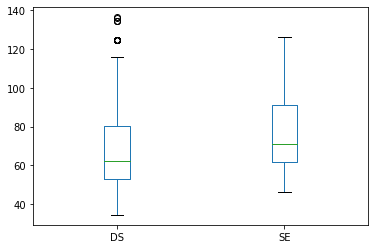

In [32]:
combine_wo_intern = pd.concat([DS_minus_intern,SE_minus_intern],axis=1)
combine_wo_intern = combine_wo_intern.rename(index=str, columns={0: "DS", 1:"SE"})
combine_wo_intern.plot.box()

In [33]:
skills

['python',
 'masters',
 'statistic',
 'SQL',
 'spark',
 'AWS',
 'Tableau',
 'Hadoop',
 'C_lang',
 'Java',
 'app',
 'debug',
 'HTML',
 'object']

In [34]:
DS_skills = ['python', 'masters','statistic','SQL','spark','AWS','Tableau',
 'Hadoop']
#DS_skills_dat = 
SE_skills = ['C_lang', 'Java', 'app', 'debug', 'HTML', 'object']
DS_sals_df = DS_sals.to_frame()
SE_sals_df = SE_sals.to_frame()



In [35]:
DS_state_sal = df[df.Job_Code == "DS"][['job_state','avg_salary']]
SE_state_sal = df[df.Job_Code == "SE"][['job_state','avg_salary']]

In [36]:
DS_state_sal = DS_state_sal[DS_state_sal.job_state != "Remote"]
DS_state_sal = DS_state_sal[DS_state_sal.job_state != "United States"]
DS_state_indsal = DS_state_sal.sort_values(by=['avg_salary'], ascending = False)
DS_state_indsal20 = DS_state_indsal[:20]
State_DS = DS_state_sal.job_state.unique()
#len(highState_DS)
#State_DS
#DS_state_indsal20

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'States Paying Top 20 Salaries - Entry Data Scientist Positions')]

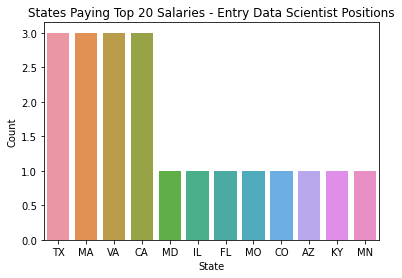

In [37]:
bplot = sns.barplot(x= DS_state_indsal20.job_state.value_counts().index, y= DS_state_indsal20.job_state.value_counts())
bplot.set(xlabel='State', ylabel='Count', title='States Paying Top 20 Salaries - Entry Data Scientist Positions')

In [38]:
test = DS_state_sal[DS_state_sal.job_state == "MA"]
test = test.avg_salary.apply(lambda x: int(x))
#test.groupby('avg_salary').mean()
test
test.mean()

72.96774193548387

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Average Salary in $1,000'),
 Text(0.5, 1.0, 'Top 20 States with Highest Average Salary in Entry Data Scientist Positions')]

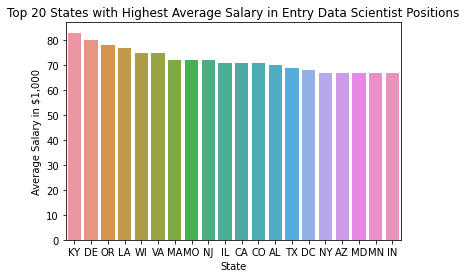

In [39]:
DS_sal_by_state = dict()
#State_DS = list(State_DS)
for state in State_DS:
    x = DS_state_sal[DS_state_sal.job_state == state]
    x = x.avg_salary.apply(lambda x: int(x))
    DS_sal_by_state[state] = round(x.mean(),2)

DS_sal_by_state = pd.DataFrame.from_dict(data = DS_sal_by_state, dtype=np.int8, orient='index', columns = ['average salary (K)'])
DS_sal_by_state = DS_sal_by_state.sort_values(by=['average salary (K)'], ascending = False)
DS_sal_by_state_high20 = DS_sal_by_state[:20]
#DS_sal_by_state_high20
bplot1 = sns.barplot(x= DS_sal_by_state_high20.index, y = DS_sal_by_state_high20['average salary (K)'])
bplot1.set(xlabel='State', ylabel='Average Salary in $1,000', title='Top 20 States with Highest Average Salary in Entry Data Scientist Positions')

In [40]:
SE_state_sal = SE_state_sal[SE_state_sal.job_state != "Remote"]
SE_state_sal = SE_state_sal[SE_state_sal.job_state != "United States"]
SE_state_sal = SE_state_sal.sort_values(by=['avg_salary'], ascending = False)
SE_state_sal_high = SE_state_sal[:20]
highState_SE = SE_state_sal_high.job_state.unique()
len(highState_SE)
highState_SE
SE_state_sal_high

,job_state,avg_salary
905,WA,126.5
957,CA,120.5
949,OH,120.5
942,CA,120.5
943,MD,120.5
944,MI,120.5
945,FL,120.5
946,OR,120.5
947,OH,120.5
950,NC,120.5


In [41]:
SE_state_sal = SE_state_sal[SE_state_sal.job_state != "Remote"]
SE_state_sal = SE_state_sal[SE_state_sal.job_state != "United States"]
SE_state_indsal = SE_state_sal.sort_values(by=['avg_salary'], ascending = False)
SE_state_indsal20 = SE_state_indsal[:20]
State_SE = SE_state_sal.job_state.unique()

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'States Paying Top 20 Salaries - Entry Software Engineer Positions')]

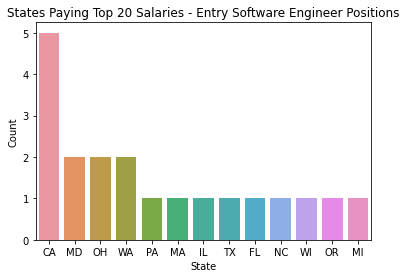

In [42]:
bplot2 = sns.barplot(x= SE_state_indsal20.job_state.value_counts().index, y= SE_state_indsal20.job_state.value_counts())
bplot2.set(xlabel='State', ylabel='Count', title='States Paying Top 20 Salaries - Entry Software Engineer Positions')

[Text(0.5, 0, 'State'),
 Text(0, 0.5, 'Average Salary in $1,000'),
 Text(0.5, 1.0, 'Top 20 States with Highest Average Salary in Entry Software Engineer Positions')]

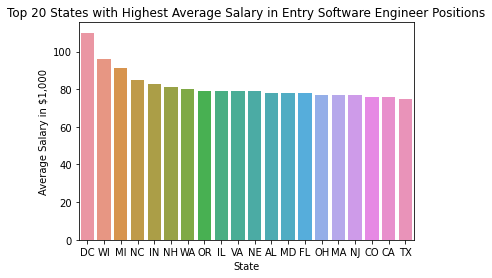

In [43]:
SE_sal_by_state = dict()
#State_SE = list(State_SE)
for state in State_SE:
    x = SE_state_sal[SE_state_sal.job_state == state]
    x = x.avg_salary.apply(lambda x: int(x))
    SE_sal_by_state[state] = round(x.mean(),2)

SE_sal_by_state = pd.DataFrame.from_dict(data = SE_sal_by_state, dtype=np.int8, orient='index', columns = ['average salary (K)'])
SE_sal_by_state = SE_sal_by_state.sort_values(by=['average salary (K)'], ascending = False)
SE_sal_by_state_high20 = SE_sal_by_state[:20]
SE_sal_by_state_high20
bplot3 = sns.barplot(x= SE_sal_by_state_high20.index, y = SE_sal_by_state_high20['average salary (K)'])
bplot3.set(xlabel='State', ylabel='Average Salary in $1,000', title='Top 20 States with Highest Average Salary in Entry Software Engineer Positions')

In [44]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Job_Code', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'python', 'masters', 'statistic', 'SQL', 'spark', 'AWS', 'Tableau',
       'Hadoop', 'C_lang', 'Java', 'app', 'debug', 'HTML', 'object',
       'experience'],
      dtype='object')

In [45]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
from nltk.tokenize import *

In [46]:
DS_jobdesc = df.apply(lambda x: x['Job Description'] if x['Job_Code'] == 'DS' else -1, axis = 1)
DS_jobdesc = DS_jobdesc[DS_jobdesc != -1]


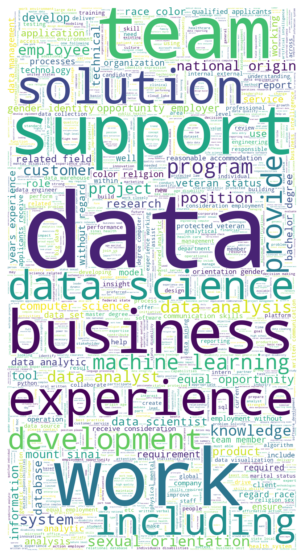

In [47]:
words = " ".join(DS_jobdesc)

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
SE_jobdesc = df.apply(lambda x: x['Job Description'] if x['Job_Code'] == 'SE' else -1, axis = 1)
SE_jobdesc = SE_jobdesc[SE_jobdesc != -1]

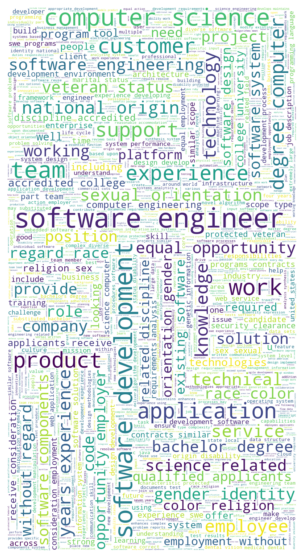

In [49]:
words = " ".join(SE_jobdesc)

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [50]:
df.to_csv('df_cleaned.csv', index = False)